In [6]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('science')

import os, sys, time


sys.path.insert(0,"/home/nico/Tools/petsc-3.12.5/lib/petsc/bin/")
sys.path.insert(0,"/home/nico/Documents/TEAR/Codes_TEAR/se2dr/se2wave/utils/python/")
sys.path.insert(0,"/home/nico/Documents/TEAR/Codes_TEAR/PythonCodes/LibFolder")
from se2waveload import *
from Lib_GeneralFunctions import *
from GeneratePaperFigs import *
from ModelIllustration import *

In [7]:
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16
FontSizeControlFreak(SMALL_SIZE,MEDIUM_SIZE,BIGGER_SIZE)

In [8]:
from palettable.colorbrewer.diverging import PuOr_11_r as FieldColor

cmap = FieldColor.mpl_colormap

from matplotlib.colors import ListedColormap
import matplotlib.lines as mlines
from palettable.cartocolors.qualitative import Safe_5 as LineColor

cmapProf = ListedColormap(LineColor.mpl_colors[:])

In [9]:
start_time = time.time()
fname = "step-{timestep:04}_wavefield.pbin"
path = "/home/nico/Documents/Documents/SharedWolfel/PaperData/220120FieldData/TEAR18_Kos_T20_P3_025x025_A12phi65_Delta2.501/"


path = "/home/nico/Documents/TEAR/Codes_TEAR/ProfilePicking/Output/"
# Reference saved into a list of objects
RefList = [SSCreference(path + "Reference/sem2dpack/sem2d-{}-0.txt", "0km"),
           SSCreference(path + "Reference/sem2dpack/sem2d-{}-1.txt", "2km"),
           SSCreference(path + "Reference/sem2dpack/sem2d-{}-2.txt", "4km"),
           SSCreference(path + "Reference/sem2dpack/sem2d-{}-3.txt", "6km"),
           SSCreference(path + "Reference/sem2dpack/sem2d-{}-4.txt", "8km"),
          ]

pathTPV = "/home/nico/Documents/TEAR/Codes_TEAR/ProfilePicking/[TPV3]Results/"

# Reference saved into a list of objects

RefListTPV =  [TPV3reference(pathTPV + "Reference/sem2dpack/[TPV3]sem2dpack-{}-receiver-0.0e+00.txt", "0km"),
               TPV3reference(pathTPV + "Reference/sem2dpack/[TPV3]sem2dpack-{}-receiver-2.0e+03.txt", "2km"),
               TPV3reference(pathTPV + "Reference/sem2dpack/[TPV3]sem2dpack-{}-receiver-4.0e+03.txt", "4km"),
               TPV3reference(pathTPV + "Reference/sem2dpack/[TPV3]sem2dpack-{}-receiver-6.0e+03.txt", "6km"),
               TPV3reference(pathTPV + "Reference/sem2dpack/[TPV3]sem2dpack-{}-receiver-8.0e+03.txt", "8km"),
              ]


In [10]:
FolderTiltedPath = "/home/nico/Documents/Documents/SharedWolfel/PaperData/ConvTPV/20220124/"
DataProfile = LoadPickleFile(Filename = "TEAR18_Kos_T20_P3_025x025_A12phi65_Delta2.501-Tilt20.0-P3-TPList_t8180_d62.525.pickle",FolderPath = FolderTiltedPath)

x0,y0 = 7350,2675
InsetAxis = [x0-200,x0+200,y0-200,y0+200]
F1, ax = Plot4KomaSetup(LCoorX, LCoorY, LFieldX, LFieldvelX, 
           ["X-Component Displacement ", "X-Component Displacement [m]"],
           TimeStepVal,InsetAxis,
            cmap=cmap)
del x0,y0,InsetAxis


# Tilted case plotting
iidx = 0
for iidx,Test1 in enumerate(DataProfile):
    ax[0].plot(Test1.Time, Test1.DispX, color= cmapProf.colors[iidx], linewidth=1.5, zorder=iidx)
    ax[1].plot(Test1.Time, Test1.VelX,  color= cmapProf.colors[iidx], linewidth=1.5, zorder=iidx) 


ax[0].set_xlabel("time [s]")

#F1.suptitle("Tilting (20deg) Kostrov simulation")
[item.PlotReference(ax[0], "Slip", filtering=False) for item in RefList]
[item.PlotReference(ax[1], "SlipRate", filtering=False) for item in RefList]


Format_LabelsOnFig_formatAxis(F1, ax[:2],inverted=True, ncols = 3)


LabelizeAxisList(ax,Pos=[0.9, 0.9],fontsize=BIGGER_SIZE)


#F1.savefig('/home/nico/LRZ Sync+Share/SharedWolfel/Works/se2dr_Paper/Illustrations/V7/F3.png',
#            bbox_inches='tight', dpi=100)

NameError: name 'LCoorX' is not defined

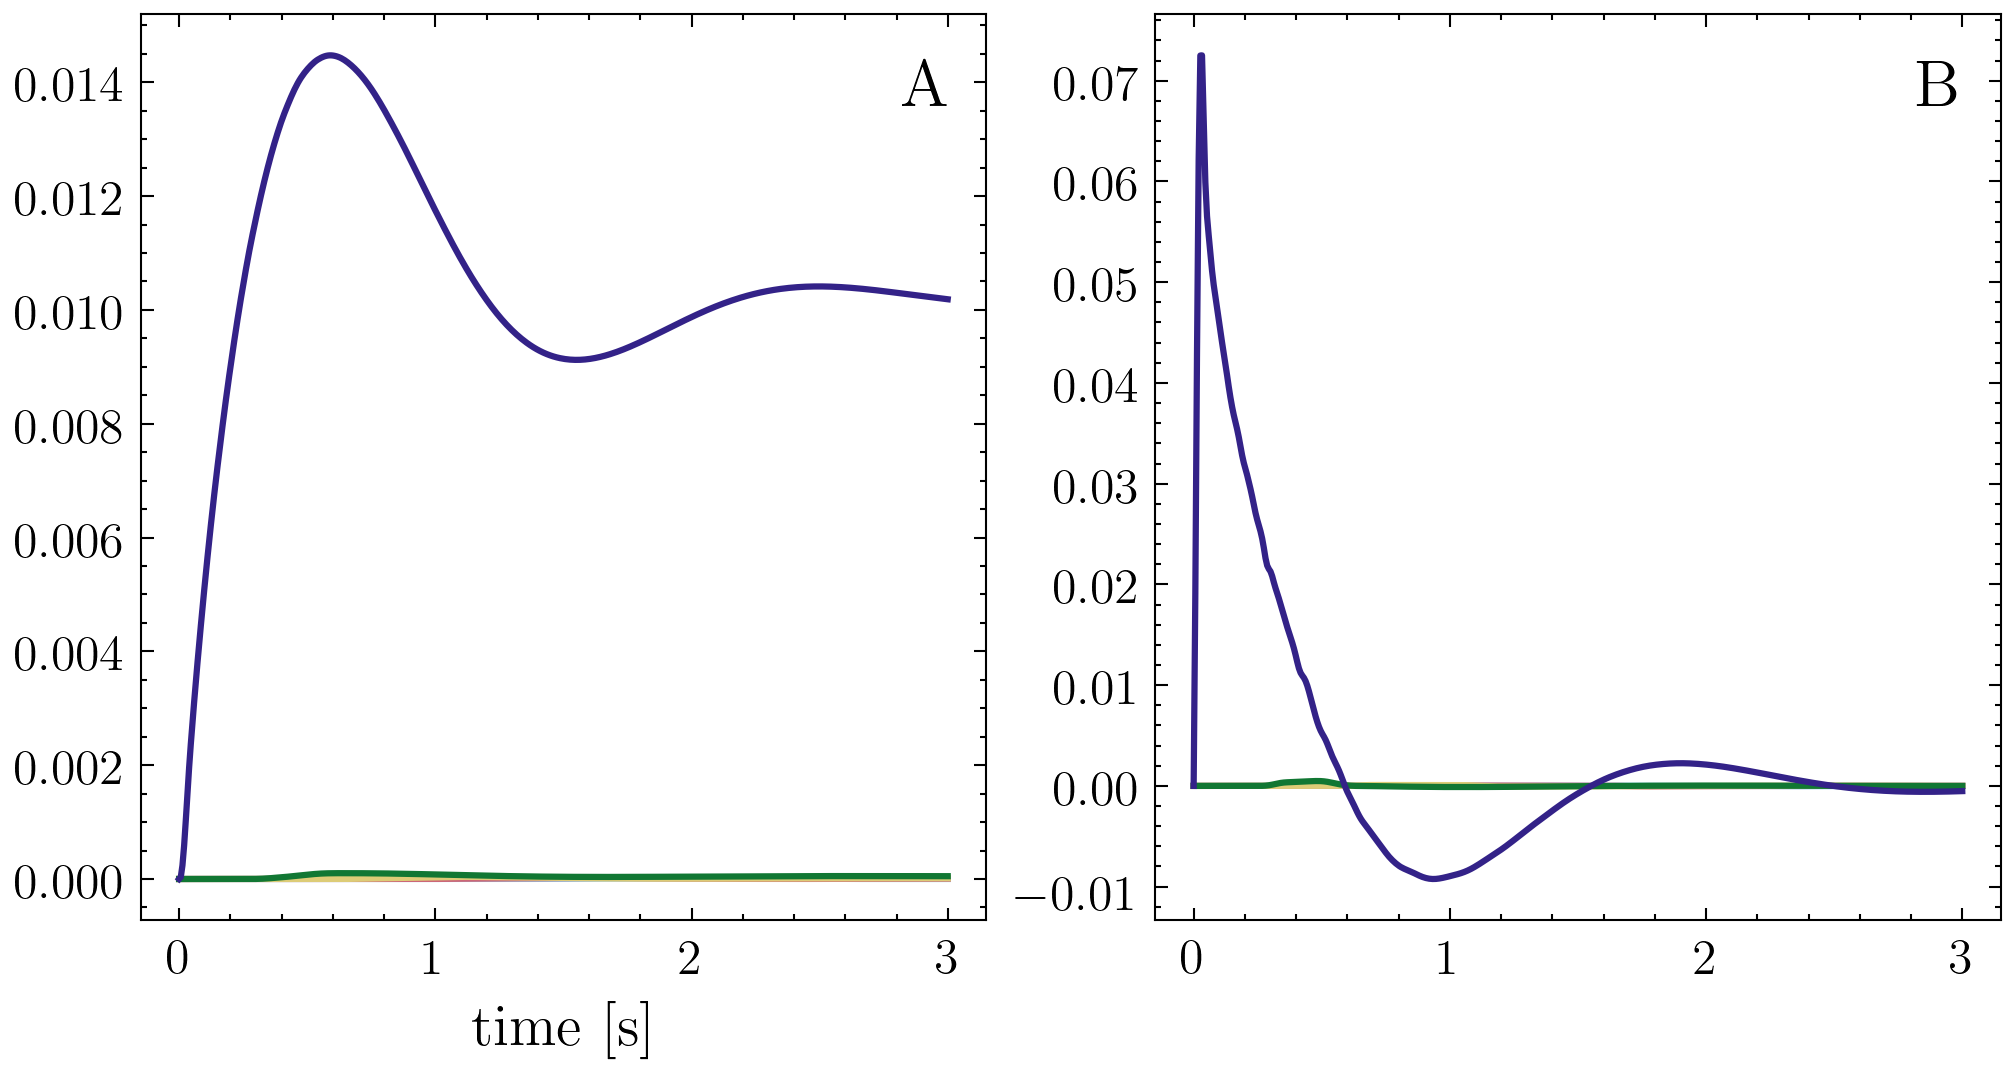

In [19]:
FolderTiltedPath = "/home/nico/Documents/Documents/SharedWolfel/PaperData/ConvTPV/20220228/"
DataProfile = LoadPickleFile(Filename = "TEAR28_TPV3_Gauss_P3_050x050_A12phi65_Delta1.001_3s-Tilt0.0-P3-TPList_t4600_d50.05.pickle",FolderPath = FolderTiltedPath)

F1 = plt.figure(figsize = (8, 4),dpi=300)
gs = F1.add_gridspec(1, 2)
ax=[None,None]
ax[0] = F1.add_subplot(gs[0])
ax[1] = F1.add_subplot(gs[1])


# Tilted case plotting
iidx = 0
for iidx,Test1 in enumerate(DataProfile):
    ax[0].plot(Test1.Time, Test1.DispX, color= cmapProf.colors[iidx], linewidth=1.5, zorder=iidx)
    ax[1].plot(Test1.Time, Test1.VelX,  color= cmapProf.colors[iidx], linewidth=1.5, zorder=iidx) 


ax[0].set_xlabel("time [s]")

#F1.suptitle("Tilting (20deg) Kostrov simulation")
#[item.PlotReference(ax[0], "Slip", filtering=False) for item in RefList]
#[item.PlotReference(ax[1], "SlipRate", filtering=False) for item in RefList]


#Format_LabelsOnFig_formatAxis(F1, ax[:2],inverted=True, ncols = 3)


LabelizeAxisList(ax,Pos=[0.9, 0.9],fontsize=BIGGER_SIZE)


#F1.savefig('/home/nico/LRZ Sync+Share/SharedWolfel/Works/se2dr_Paper/Illustrations/V7/F3.png',
#            bbox_inches='tight', dpi=100)